In [1]:
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

Automatically created module for IPython interactive environment


['setosa' 'versicolor' 'virginica']


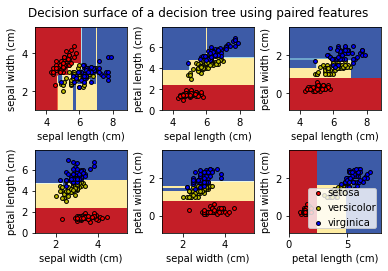

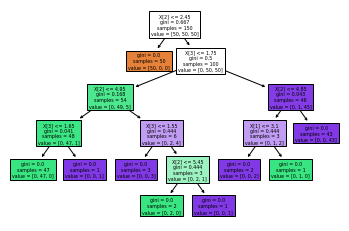

In [2]:
#this is a example of the scikit-learn
#https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()
print(iris.target_names)
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
   
    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

In [3]:
#preprocessing

# Load data
df = pd.read_csv('../dataset/transform/data100.csv')  

values = {'timeDomain':0, 'fourierDomain':0, 'waveletsDomain':0, 'autoCorrelation':0, 'zeroCrossX':0, 'zeroCrossY':0, 'sDomain':0}
df = df.fillna(value=values)

idx_names = {"8PSK":0, "16QAM":1, "64QAM":2, "BPSK":3, "CPFSK":4, "GFSK":5, "QPSK":6, "PAM4":8}
key_idx = list(idx_names.keys()) 
val_idx = list(idx_names.values())
df = df.replace(idx_names)

df.head()

,Unnamed: 0,file,wave,bandpass,timeDomain,fourierDomain,waveletsDomain,autoCorrelation,zeroCrossX,zeroCrossY,sDomain,constellationCurrent,constellationPrior
0,1,frame8PSK001.mat,0,0.639288564806097+0.219373777110327i,0.639289,0.580019,0.138648,1.000000,0.000000e+00,0.000000,0.112801,0.972567,-0.865621
1,2,frame8PSK001.mat,0,0.849460447065174+0.213477814153366i,-0.213478,0.990691,-0.556015,0.005173,4.003910e-10,0.000000,0.462911,0.972567,-0.567360
2,3,frame8PSK001.mat,0,0.865621400337684+0.433615366561115i,-0.865621,4.194832,-0.199032,-0.853113,8.007820e-10,625000.000000,0.866451,0.972567,-0.850955
3,4,frame8PSK001.mat,0,0.854913451824652+0.386868126121948i,0.386868,4.317113,0.679638,-0.036865,1.201173e-09,0.000000,0.332914,0.972567,-0.585230
4,5,frame8PSK001.mat,0,0.621987408926032+0.525392860790058i,0.621987,2.597466,-0.876263,0.546657,1.601564e-09,833333.333333,0.408870,0.697013,-0.865621


In [ ]:
# Parameters
n_classes = 8
plot_colors = "ryb"
plot_step = 0.02

#4 - timeDomain
#5,6 - fourierDomain / waveletsDomain
#7 - autoCorrelation
#8,9 - zeroCrossX / zeroCrossY 
#10 - sDomain
for pairidx, pair in enumerate([['timeDomain', 'fourierDomain'], ['timeDomain', 'waveletsDomain'], ['timeDomain', 'autoCorrelation'], ['timeDomain', 'zeroCrossX'], ['timeDomain', 'zeroCrossY'], ['timeDomain', 'sDomain'],
                                ['fourierDomain', 'waveletsDomain'], ['fourierDomain', 'autoCorrelation'], ['fourierDomain', 'zeroCrossX'], ['fourierDomain', 'zeroCrossY'], ['fourierDomain', 'sDomain'], 
                                ['waveletsDomain', 'autoCorrelation'], ['waveletsDomain', 'zeroCrossX'], ['waveletsDomain', 'zeroCrossY'], ['waveletsDomain', 'sDomain'], 
                                ['autoCorrelation', 'zeroCrossX'], ['autoCorrelation', 'zeroCrossY'], ['autoCorrelation', 'sDomain'], 
                                ['zeroCrossX', 'zeroCrossY'], ['zeroCrossX', 'sDomain'], 
                                ['zeroCrossY', 'sDomain'], ]):
    X = df[pair]
    y = df.wave
    
    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    
    x_min, x_max = X[pair[0]].min() - 1, X[pair[0]].max() + 1
    y_min, y_max = X[pair[1]].min() - 1, X[pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        
        plt.scatter(df.iloc[idx[0], df.columns.get_loc(pair[0])], 
                    df.iloc[idx[0], df.columns.get_loc(pair[1])], 
                    c=color, label=key_idx[val_idx.index(i)], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(df[values.keys()], key_idx)
plot_tree(clf, filled=True)
plt.show()